<a href="https://colab.research.google.com/github/NikhilReddii/covid-19_prediction/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [83]:
covid=pd.read_excel(r'covid_19_india_new.xlsx')
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-30,Kerala,India,18:00:00,1,0,0
1,2,2020-01-31,Kerala,India,18:00:00,1,0,0
2,3,2020-02-01,Kerala,India,18:00:00,2,0,0
3,4,2020-02-02,Kerala,India,18:00:00,3,0,0
4,5,2020-02-03,Kerala,India,18:00:00,3,0,0
...,...,...,...,...,...,...,...,...
8481,8482,2020-11-16,Telengana,India,08:00:00,257876,1407,242084
8482,8483,2020-11-16,Tripura,India,08:00:00,31962,364,30555
8483,8484,2020-11-16,Uttarakhand,India,08:00:00,68215,1107,62543
8484,8485,2020-11-16,Uttar Pradesh,India,08:00:00,511304,7372,480965


In [84]:
#Data analysis for india
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    8845127
Recovered    8249579
Deaths        130070
Name: 2020-11-16 00:00:00, dtype: int64
Total Active cases 465478
Total Closed cases 8379649


In [85]:
datewise_india

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2020-11-12,8683916,8066501,128121
2020-11-13,8728795,8115580,128668
2020-11-14,8773479,8163572,129188


In [86]:
datewise_india["Weekofyear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_Deaths = []
w = 1
for i in list(datewise_india["Weekofyear"].unique()):
   india_weekwise_confirmed.append(datewise_india[datewise_india["Weekofyear"]==i]["Confirmed"].iloc[-1])
   india_weekwise_recovered.append(datewise_india[datewise_india["Weekofyear"]==i]["Recovered"].iloc[-1])
   india_weekwise_Deaths.append(datewise_india[datewise_india["Weekofyear"]==i]["Deaths"].iloc[-1])
   week_num_india.append(w)
   w=w+1
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [87]:
max_ind = datewise_india["Confirmed"].max()

print("IT took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in india to reach",max_ind,"Confirmed cases")


IT took 292 days in india to reach 8845127 Confirmed cases


In [88]:
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [89]:
print("Total number of confirmed cases in India",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases in India ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths in India ",datewise["Deaths"].iloc[-1])
print("Total number of Active cases in India",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Closed cases in India",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Total number of confirmed cases in India 8845127
Total number of Recovered cases in India  8249579
Total number of Deaths in India  130070
Total number of Active cases in India 465478
Total number of Closed cases in India 8379649


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

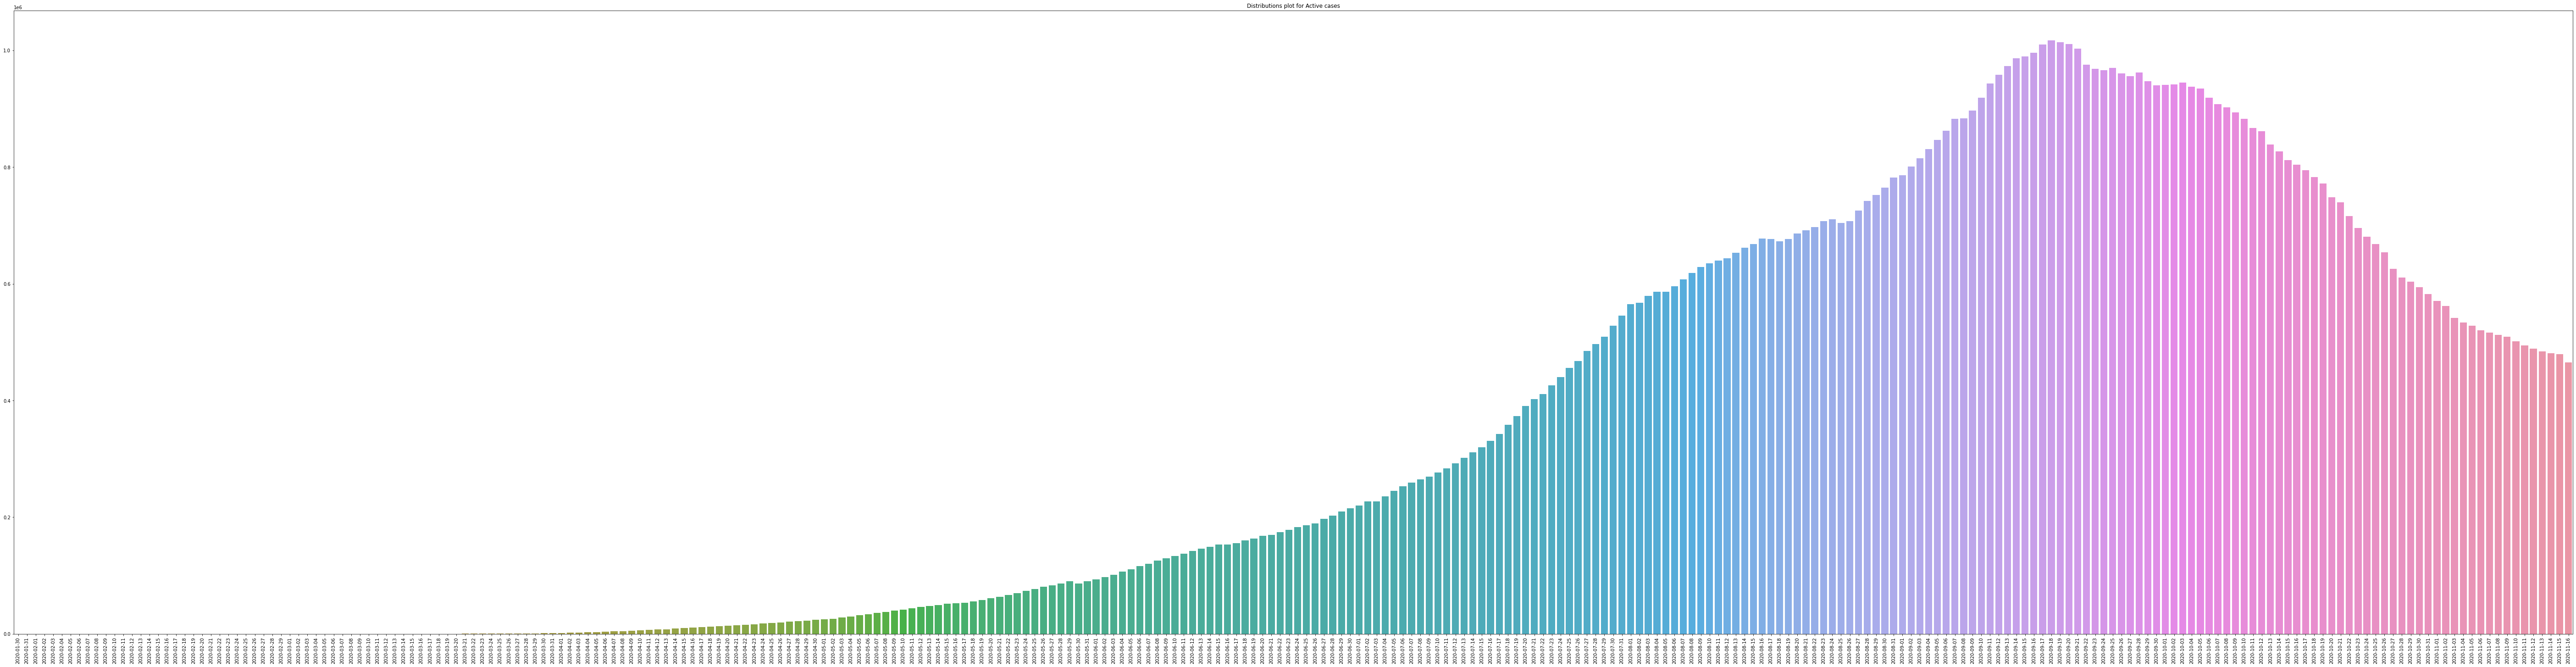

In [90]:
plt.figure(figsize=(100,25))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

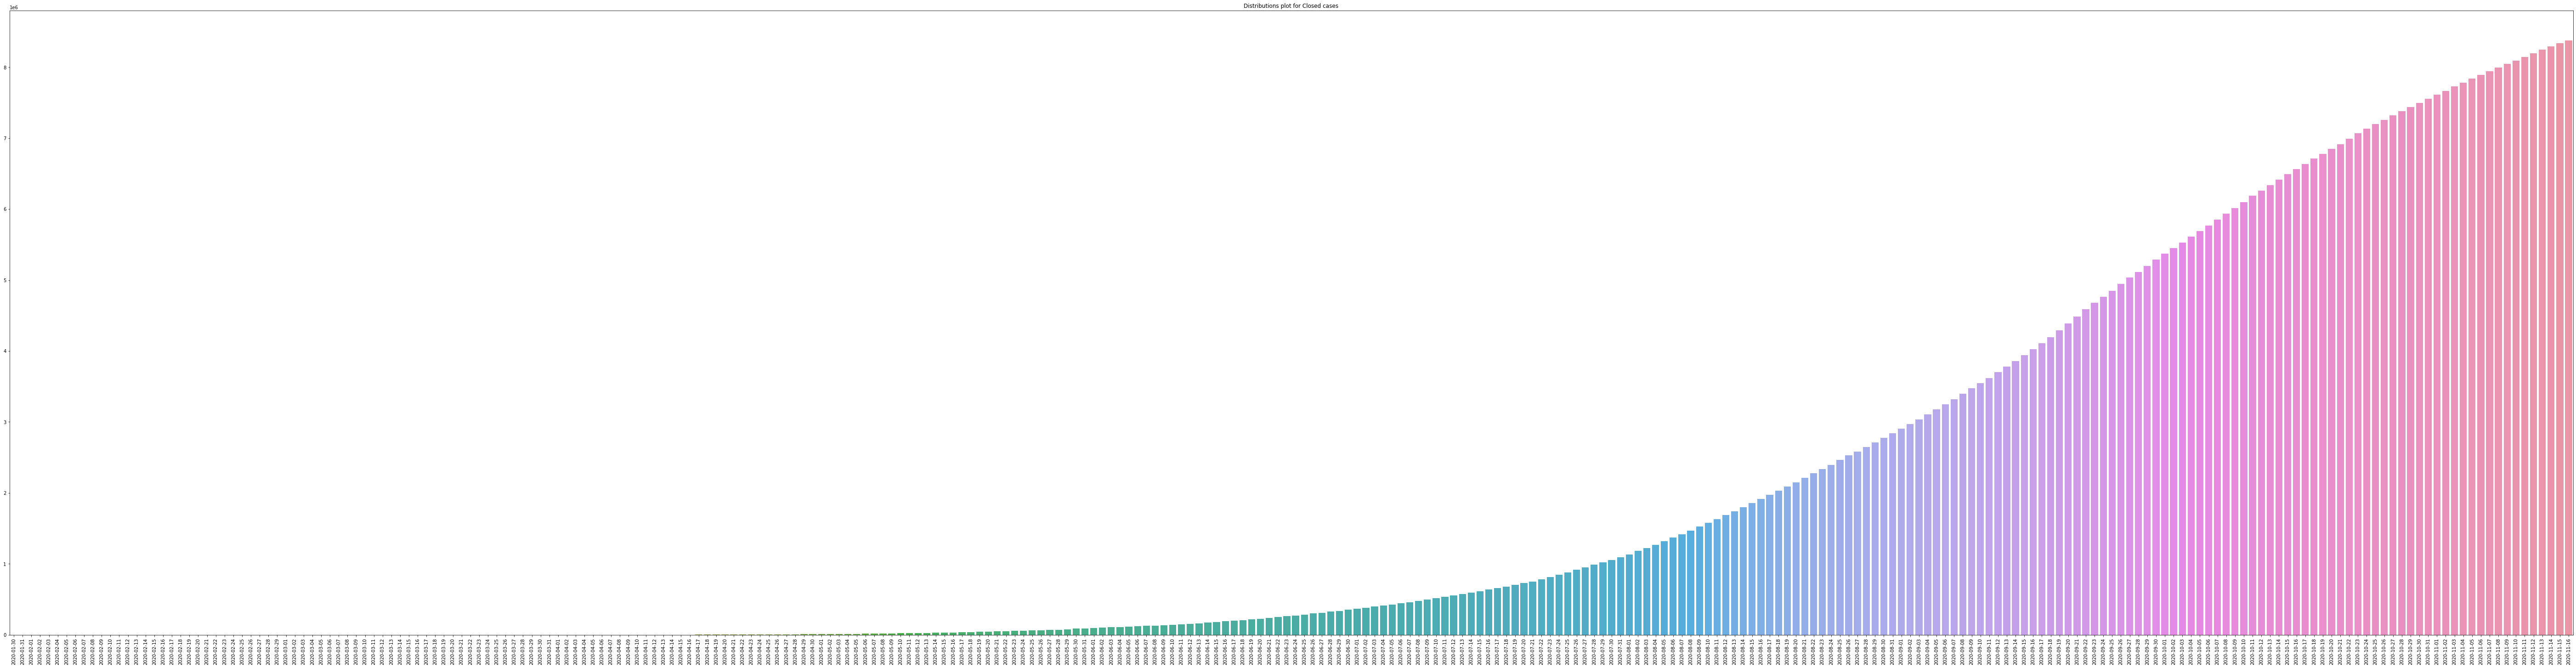

In [91]:
plt.figure(figsize=(100,25))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed cases")
plt.xticks(rotation=90)

Average increase in number of confirmed cases everyday : 30292.0
Average increase in number of recovered cases everyday : 28252.0
Average increase in number of Death cases everyday : 445.0


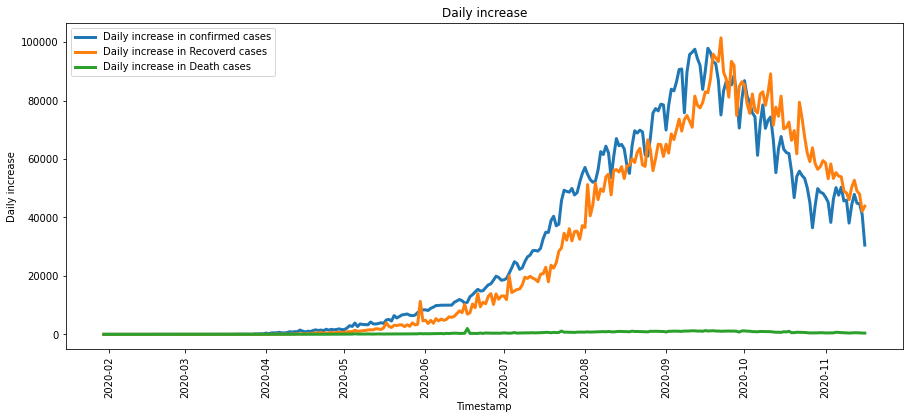

In [92]:
print("Average increase in number of confirmed cases everyday :",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday :",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday :",np.round(datewise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recoverd cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [93]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [95]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lassoReg = Lasso(alpha=0.1, normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
lassoReg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [96]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediciton_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_lasso=lassoReg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [97]:
new_data =[]
new_prediction_lr=[]
new_prediction_svm=[]
new_prediction_lasso=[]
for i in range(1,18):
  new_data.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
  new_prediction_lasso.append(lassoReg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x) 
model_predictions=pd.DataFrame(zip(new_data,new_prediction_lr,new_prediction_svm,new_prediction_lasso),columns = ["Dates","LR","SVM","Lasso"])


In [98]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [101]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["ES"]=holt_new_prediction

print("------PREDICTION OF CONFIRMED CASES--------")
model_predictions.head()


------PREDICTION OF CONFIRMED CASES--------


,Dates,LR,SVM,Lasso,ES
0,2020-11-17,6088735,11422184,6088732,10173116
1,2020-11-18,6116306,11618012,6116302,10255347
2,2020-11-19,6143876,11816531,6143873,10337578
3,2020-11-20,6171447,12017770,6171444,10419808
4,2020-11-21,6199017,12221756,6199014,10502039


In [102]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))
lassoReg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [103]:
new_data =[]
new_prediction_lr=[]
new_prediction_svm=[]
new_prediction_lasso=[]
for i in range(1,18):
  new_data.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
  new_prediction_lasso.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])


pd.set_option("display.float_format",lambda x:'%.f' %x) 
model_predictions=pd.DataFrame(zip(new_data,new_prediction_lr,new_prediction_svm,new_prediction_lasso),columns = ["Dates","LR","SVM","Lasso"])

In [104]:
holt=Holt(np.asarray(model_train["Deaths"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["ES"]=holt_new_prediction

print("------PREDICTION OF DEATHS--------")
model_predictions.head()

------PREDICTION OF DEATHS--------


,Dates,LR,SVM,Lasso,ES
0,2020-11-17,100146,231061,231061,149629
1,2020-11-18,100590,235022,235022,150714
2,2020-11-19,101034,239036,239036,151798
3,2020-11-20,101479,243106,243106,152883
4,2020-11-21,101923,247231,247231,153967


In [105]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))
lassoReg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [106]:
new_data =[]
new_prediction_lr=[]
new_prediction_svm=[]
new_prediction_lasso=[]
for i in range(1,18):
  new_data.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
  new_prediction_lasso.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x) 
model_predictions=pd.DataFrame(zip(new_data,new_prediction_lr,new_prediction_svm,new_prediction_lasso),columns = ["Dates","LR","SVM","Lasso"])

In [108]:
holt=Holt(np.asarray(model_train["Recovered"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["ES"]=holt_new_prediction
print("------PREDICTION OF RECOVERED CASES--------")
model_predictions.head()

------PREDICTION OF RECOVERED CASES--------


,Dates,LR,SVM,Lasso,ES
0,2020-11-17,5034212,10314372,10314372,9139772
1,2020-11-18,5057282,10492212,10492212,9222311
2,2020-11-19,5080352,10672497,10672497,9304850
3,2020-11-20,5103422,10855252,10855252,9387390
4,2020-11-21,5126492,11040502,11040502,9469929
